# Dataset Analytics

Objective: Use the Rendered.ai SDK to access and run Analytics jobs on the Platform.

Reference the latest SDK Documentation at https://sdk.rendered.ai

### The Analytics Job
The Analytics job is used to generate different types of metrics for a dataset. The basic types of analytics are:

- properties - high level metrics of the job, such as the distribution of image sizes and formats
- objectMetrics - metrics of object classes, such as distributions and bounding box sizes
- meanBrightness - histogram of the average brightness where each image contributes a count. It is an example of a pixel level metric. Comparing this metric to the target can inform the lighting of the channel/graph

### Get the latest `anatools`

In [ ]:
pip install anatools --upgrade

### Set up imports and log into the SDK
These imports are required for this Notebook to run. 
Enter your credentials at the prompts. Logging in successfully will list the organizations and workspaces you have access to.

In [37]:
from zipfile import ZipFile
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob
import json
import pprint
import time 
import anatools

pp = pprint.PrettyPrinter(indent=2)

In [1]:
sdk = anatools.client()

Enter your credentials for the Rendered.ai Platform.
Email: email@rendered.ai
········
These are your organizations and workspaces:
    default Organization                          e8af8e7e-60d3-415f-a88d-9f4e191afec4              
	Example                                   c721696e-648f-4572-a9ca-5dd72f1e8f58              
The current workspaces is: c721696e-648f-4572-a9ca-5dd72f1e8f58


### Get Analytics Types

The types of analytics can be retrieved with the `get_analytics_types()` SDK function. 

In [5]:
sdk.get_analytics_types()

['objectMetrics', 'meanBrightness', 'properties']

### Run an Analytics job

Analytics jobs are kicked off with the command `create_analytics`, which returns an analytics job id.  The analytics job id can be used with `get_analytics` to poll for the job status and collect the results.

Let's use a prior dataset we created to run this job on. Note that `create_analytics` will install images to your current working directory when it is complete. 

In [33]:
# Choose your dataset
datasetId = '6e396ea6-e394-4566-8259-76bcadc16ab7'

# Create an analytics job : CHOOSE TYPE
#analyticsId = sdk.create_analytics(datasetId, type='properties')
analyticsId = sdk.create_analytics(datasetId, type='objectMetrics')
print("Analytics ID: " + analyticsId)

Analytics ID: e16ddef5-66a8-4fef-815f-8e7e09aa6349


In [34]:
# # Confirm job completion
print("\nThis should just take a couple minutes...")
print(analyticsId)
analytics = sdk.get_analytics(datasetId, analyticsId=analyticsId)
print(analytics)

while analytics[0]['status'] not in ['complete', 'failed']:
  time.sleep(10)
  analytics = sdk.get_analytics(datasetId, analyticsId=analyticsId)
  print(analytics[0]['status'])
  
properties = json.loads(analytics[0]['result'])
for key, value in properties.items():
    print(key, ' : ', value)


This should just take a couple minutes...
e16ddef5-66a8-4fef-815f-8e7e09aa6349
[{'analyticsId': 'e16ddef5-66a8-4fef-815f-8e7e09aa6349', 'workspaceId': 'c721696e-648f-4572-a9ca-5dd72f1e8f58', 'datasetId': '6e396ea6-e394-4566-8259-76bcadc16ab7', 'status': 'starting', 'result': None, 'member': 'email@rendered.ai', 'type': 'objectMetrics', 'range': [], 'returnImages': True}]
starting
starting
starting
starting
starting
running
running
running
running
complete Downloading aspect_ratios.png...
total_objects  :  22
object_count  :  {'BubbleBottle': 3, 'PlayDough': 7, 'YoYo': 5, 'Skateboard': 6, 'Cube': 1}
object_types  :  ['PlayDough', 'Skateboard', 'YoYo', 'BubbleBottle', 'Cube']
bbox_sizes  :  /resources/3_anatools_for_ML/bbox_sizes.png
bbox_aspect_ratios  :  /resources/3_anatools_for_ML/aspect_ratios.png


### Display metrics

The output of `create_analytics`'s metrics are in image format. The two images are below.

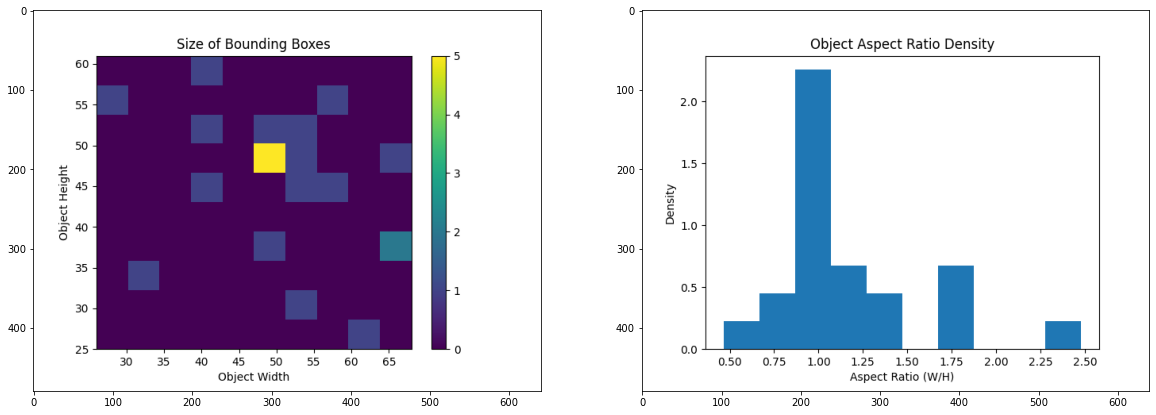

In [42]:
bbox_sizes_image = Image.open("bbox_sizes.png", 'r')
aspect_ratios_image = Image.open("aspect_ratios.png", 'r')

f = plt.figure(figsize=(20, 10))
f.add_subplot(1, 2, 1)
plt.imshow(bbox_sizes_image)

f.add_subplot(1, 2, 2)
plt.imshow(aspect_ratios_image)

plt.show()